In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from utilities import clean_data

In [8]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

print(df.shape)
df.head(n=5)

(298040, 7)


,period_end_date,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes
239152,2017-05-06,24S,-1.0,-1.0,-1.0,-1.0,-1.0
239162,2017-05-13,24S,-1.0,6.0,3.0,57.0,1765.0
239538,2017-05-20,24S,-1.0,6.0,3.0,57.0,1765.0
239200,2017-05-27,24S,-1.0,6.0,3.0,57.0,1765.0
239161,2017-06-03,24S,-1.0,24.0,3.0,109.0,3922.0


# 1) Understanding Missing Values

In [9]:


# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[::]

period_end_date                           0
business_entity_doing_business_as_name    0
followers                                 0
pictures                                  0
videos                                    0
comments                                  0
likes                                     0
dtype: int64

/Users/larsbaltensperger/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/larsbaltensperger/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

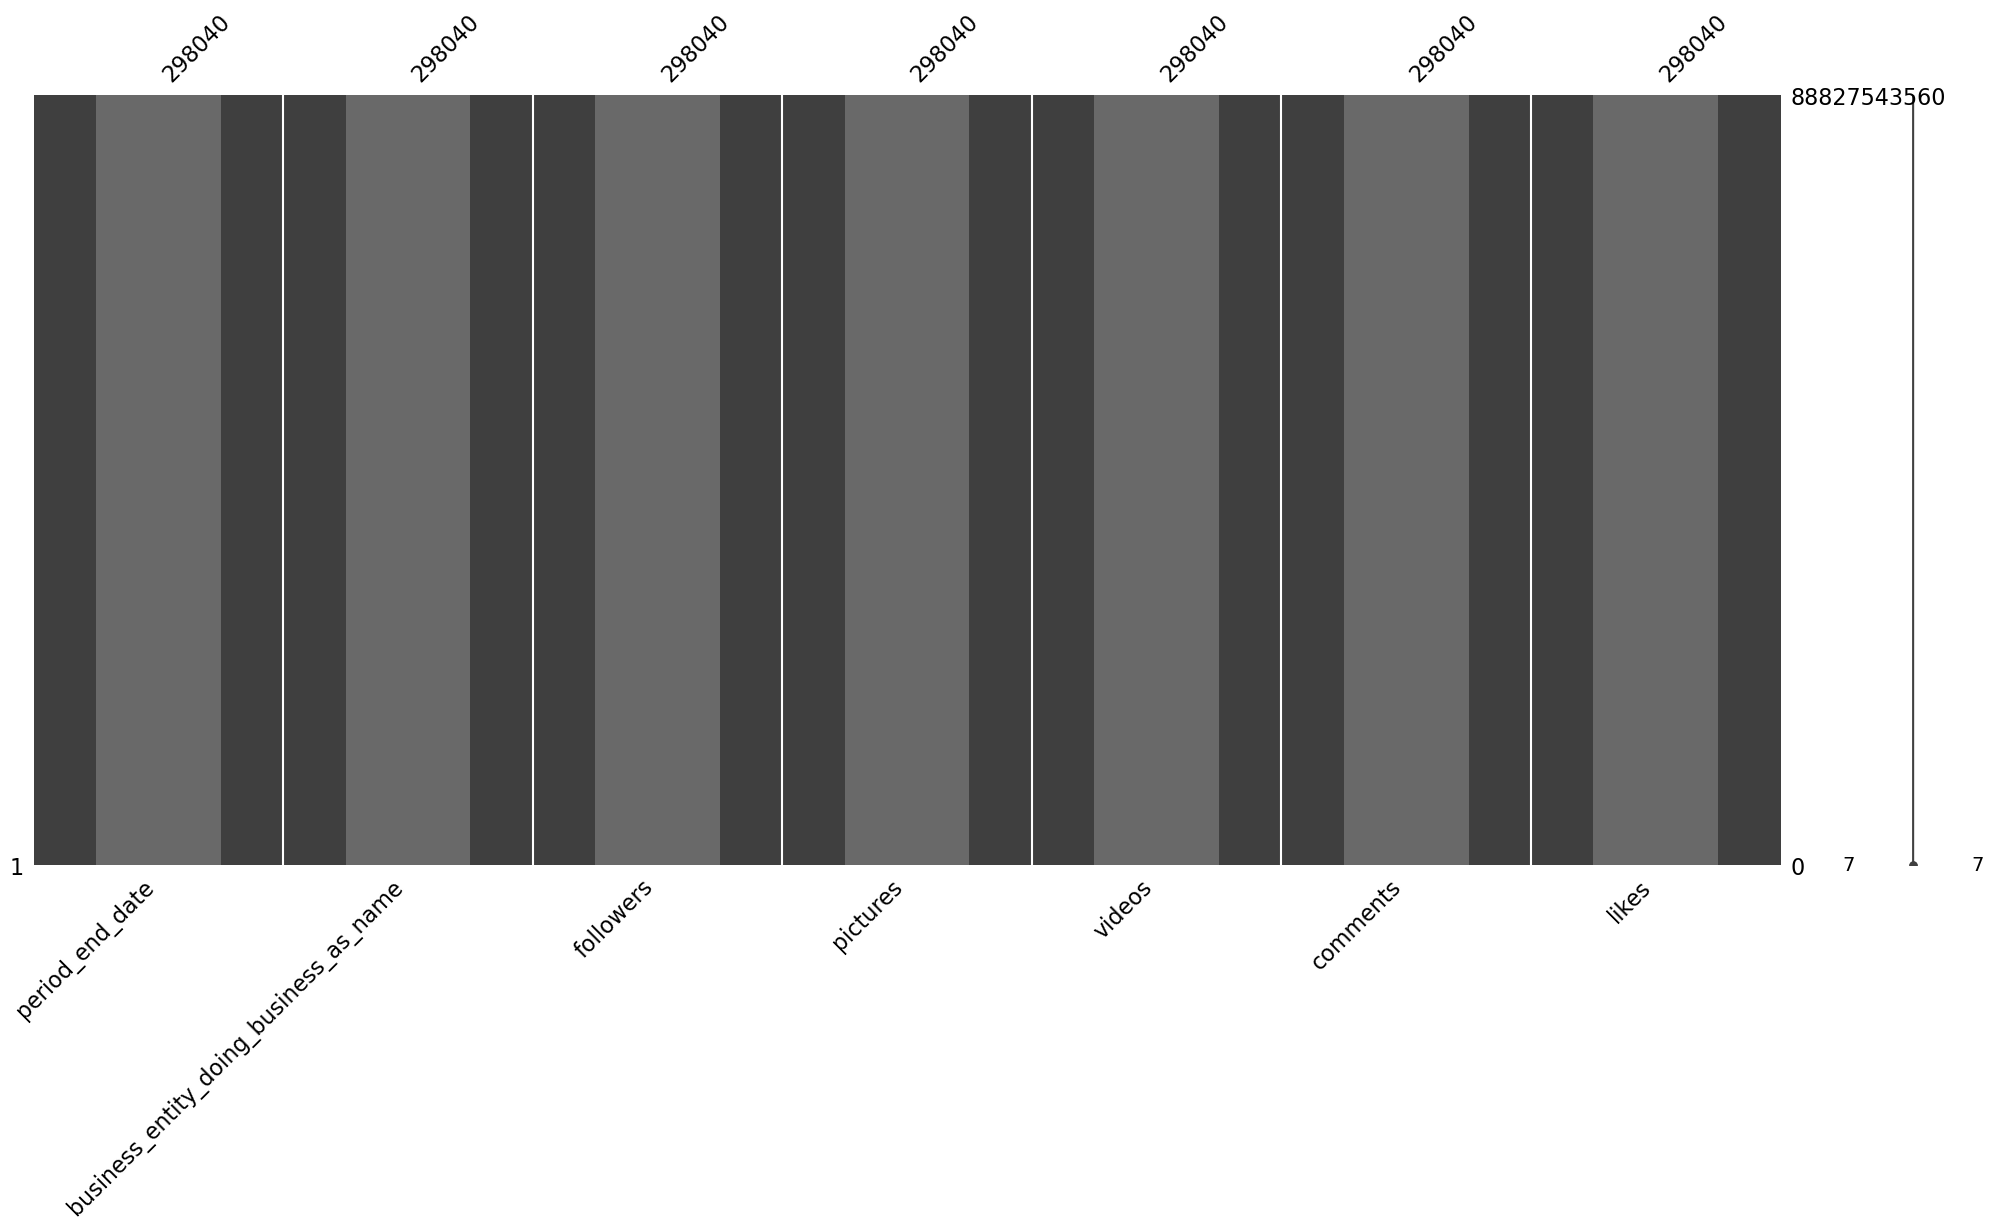

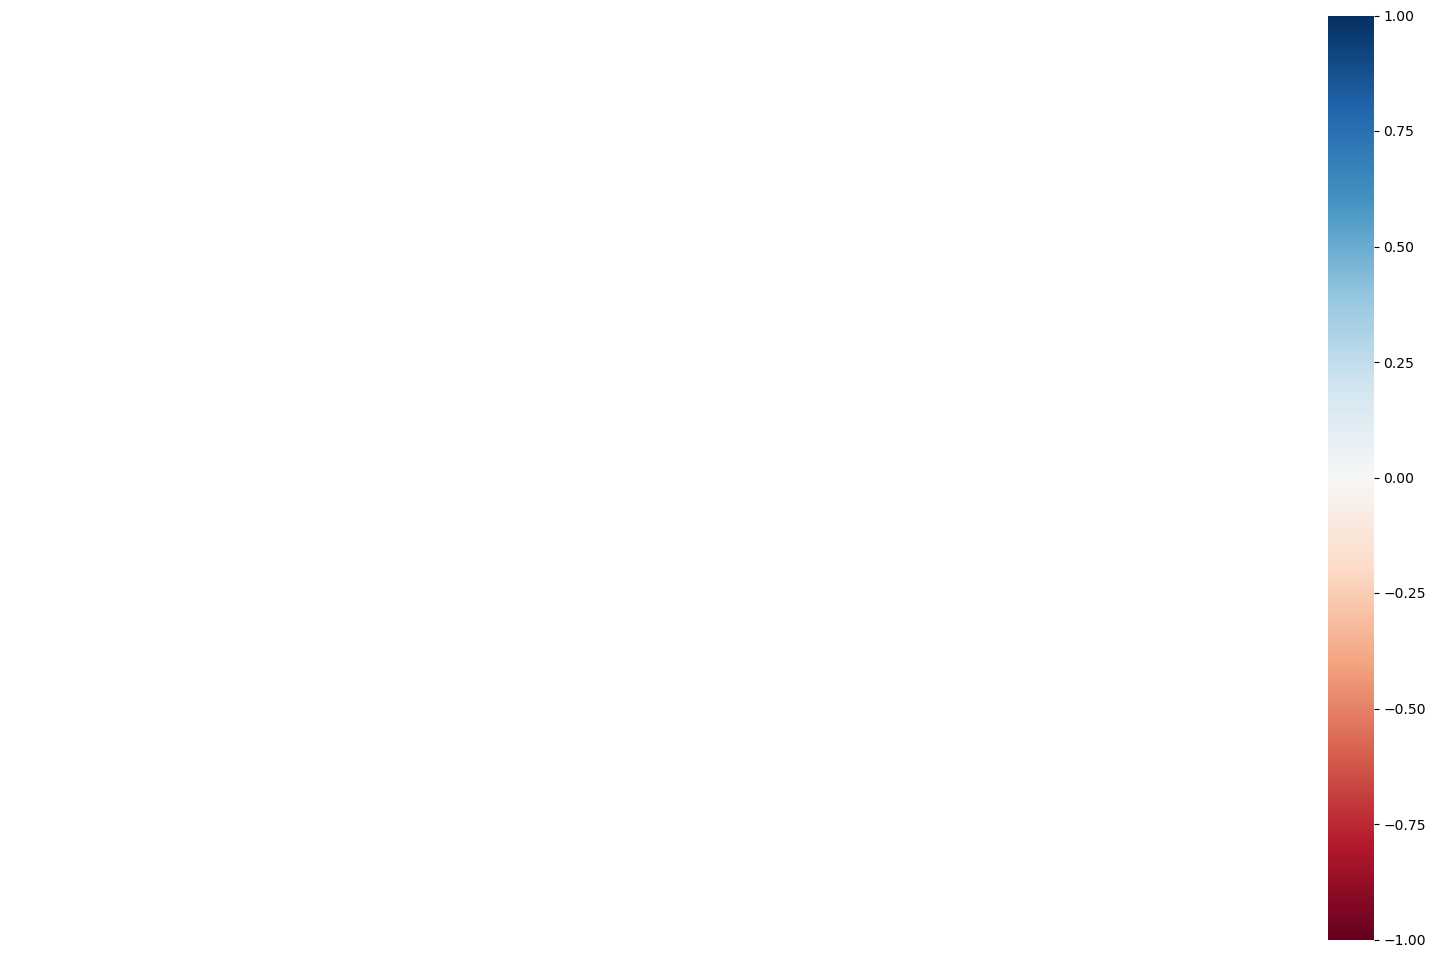

In [10]:
# Visualize the missingness
msno.matrix(df)
msno.bar(df)
msno.heatmap(df)  # Shows the correlation of missingness between every 2 columns

In [11]:
#number of entries for each unique business entity name
entries_per_business = df['business_entity_doing_business_as_name'].value_counts()

print(entries_per_business)

Loewe                  455
Michael Kors           455
Muji                   455
Mountain Dew           455
Vacheron Constantin    455
                      ... 
Sculptra               129
Temu                    55
Finding Unicorn         46
Pop Mart                46
ShopGoodwill            26
Name: business_entity_doing_business_as_name, Length: 705, dtype: int64


In [12]:
# Group the data by 'business_entity_doing_business_as_name' and sum missing values across all columns for each business
total_missing_values_per_business = df.groupby('business_entity_doing_business_as_name').apply(lambda x: x.isnull().sum().sum())

# Print the results
print(total_missing_values_per_business)

business_entity_doing_business_as_name
24S                  0
3.1 Phillip Lim      0
3CE                  0
A. Lange & Soehne    0
ANIMALE              0
                    ..
bareMinerals         0
dd's Discounts       0
e.l.f.               0
iRobot               0
shopDisney           0
Length: 705, dtype: int64


In [13]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_followers_per_business = df.groupby('business_entity_doing_business_as_name')['followers'].apply(lambda x: x.isnull().sum())

missing_followers_per_business.head()

print(missing_followers_per_business.shape)

(705,)


In [14]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_pictures_per_business = df.groupby('business_entity_doing_business_as_name')['pictures'].apply(lambda x: x.isnull().sum())

missing_pictures_per_business.head()

print(missing_pictures_per_business.shape)

(705,)


In [15]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_videos_per_business = df.groupby('business_entity_doing_business_as_name')['videos'].apply(lambda x: x.isnull().sum())

missing_videos_per_business.head()

print(missing_videos_per_business.shape)

(705,)


In [16]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_comments_per_business = df.groupby('business_entity_doing_business_as_name')['comments'].apply(lambda x: x.isnull().sum())

missing_comments_per_business.head()

print(missing_comments_per_business.shape)

(705,)


In [17]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_likes_per_business = df.groupby('business_entity_doing_business_as_name')['likes'].apply(lambda x: x.isnull().sum())

missing_likes_per_business.head()

print(missing_likes_per_business.shape)

(705,)


In [18]:
#create new dataframe
unique_business_names = entries_per_business.index.unique()

missing_df = pd.DataFrame({
    'Business Name': unique_business_names,
    'Total Entries': entries_per_business,
    'Total Missing Values': total_missing_values_per_business,
    'Missing Followers': missing_followers_per_business,
    'Missing Pictures':missing_pictures_per_business,
    'Missing Videos':missing_videos_per_business,
    'Missing Comments':missing_comments_per_business,
    'Missing Likes':missing_likes_per_business
})


missing_df.head(n=20)

#new_df.to_csv('missing.csv', index=False)

missing_df.to_csv('missing.csv', index=False, sep=',', encoding='utf-8', quotechar='"', line_terminator='\n')


subset_missing_df = missing_df.iloc[:400]

# Save the subsetted DataFrame to a new CSV file
subset_missing_df.to_csv('subset_missing.csv', index=False)

missing_df.head(n=20)

/var/folders/30/8d95fskd6r3g3m6s9td3xcgw0000gn/T/ipykernel_75038/3790720145.py:20: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  missing_df.to_csv('missing.csv', index=False, sep=',', encoding='utf-8', quotechar='"', line_terminator='\n')


,Business Name,Total Entries,Total Missing Values,Missing Followers,Missing Pictures,Missing Videos,Missing Comments,Missing Likes
24S,Loewe,333,0,0,0,0,0,0
3.1 Phillip Lim,Michael Kors,455,0,0,0,0,0,0
3CE,Muji,455,0,0,0,0,0,0
A. Lange & Soehne,Mountain Dew,403,0,0,0,0,0,0
ANIMALE,Vacheron Constantin,403,0,0,0,0,0,0
Abercrombie & Fitch,Montblanc,455,0,0,0,0,0,0
About You,Monster Energy,403,0,0,0,0,0,0
Absolut,Moncler,455,0,0,0,0,0,0
Academy Sports + Outdoors,Modelo,455,0,0,0,0,0,0
Acne Studios,Mizuno,455,0,0,0,0,0,0


In [19]:
#code to create new smaller csv file which can be used in chatGPT
data_csv = df.sort_values('period_end_date')


head = data_csv.head(n=50)

head.to_csv('head.csv', index=False)

